In [1]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
features = pd.read_csv("features_wm.csv")
sample = pd.read_csv("sampleSubmission_wm.csv")
stores = pd.read_csv("stores_wm.csv")
train = pd.read_csv("train_wm.csv")
test = pd.read_csv("test_wm.csv")

## Data Exploration (EDA)

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.shape

(8190, 12)

In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
stores.shape

(45, 3)

In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
feature_store = features.merge(stores, how="inner", on = "Store").copy()

In [9]:
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [10]:
train_df = train.merge(feature_store, how="inner", on=['Store', 'Date', 'IsHoliday'])\
    .sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True).copy()

In [11]:
test_df = test.merge(feature_store, how="inner", on=['Store', 'Date', 'IsHoliday'])\
    .sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True).copy()

In [12]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [13]:
train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [14]:
train_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [15]:
feature_store['Date'] = pd.to_datetime(feature_store['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [16]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [17]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [18]:
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [19]:
feature_store['Day'] = feature_store['Date'].dt.isocalendar().day
feature_store['Week'] = feature_store['Date'].dt.isocalendar().week
feature_store['Month'] = feature_store['Date'].dt.month
feature_store['Year'] = feature_store['Date'].dt.isocalendar().year


In [20]:
feature_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Day,Week,Month,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,5,2,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,5,6,2,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,5,7,2,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,5,8,2,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,5,9,3,2010


In [21]:
train_df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday'])\
    .sort_values(by=['Store','Dept','Date']).reset_index(drop=True).copy()
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday'])\
    .sort_values(by=['Store','Dept','Date']).reset_index(drop=True).copy()

In [22]:
df_weeks = train_df.groupby("Week").sum(numeric_only=True)


In [23]:
df_weeks.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Day,Month,Year
Week,,,,,,,,,,,,,,,,,
1,130899,260501,8.773121e+07,0,222343.25,18872.529,1.499397e+07,67007392.71,353486.72,3078155.61,15506769.87,1.008962e+06,46396.361,806775433,29515,5903,11873906
2,131036,260045,8.269676e+07,0,204005.74,19098.337,1.019858e+07,29235314.34,218513.27,1565390.83,11416226.10,1.007821e+06,46330.934,805424262,29470,5894,11855800
3,130031,259381,8.273564e+07,0,222547.92,19167.202,7.210967e+06,9824350.22,214079.04,1942054.54,8410008.53,1.006852e+06,46151.605,804330161,29385,5877,11821606
4,129971,259111,7.943483e+07,0,221326.56,19229.283,4.418107e+06,5170160.65,213215.80,296603.35,7927497.89,1.006330e+06,46135.250,803454747,29355,5871,11809533
5,195904,392036,1.419895e+08,0,317172.19,27489.729,1.140734e+08,8936033.33,448553.25,90821661.61,18580144.27,1.507341e+06,71739.976,1213767653,44290,17716,17813460


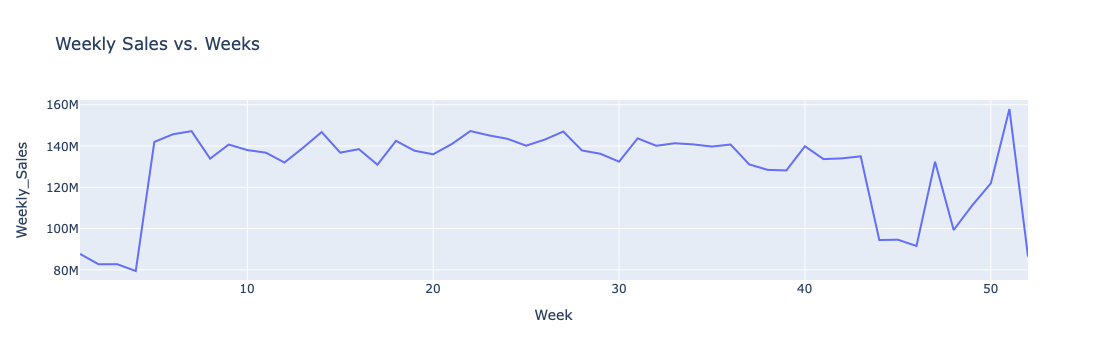

In [24]:
px.line(data_frame=df_weeks, x=df_weeks.index, y="Weekly_Sales",
       title="Weekly Sales vs. Weeks")

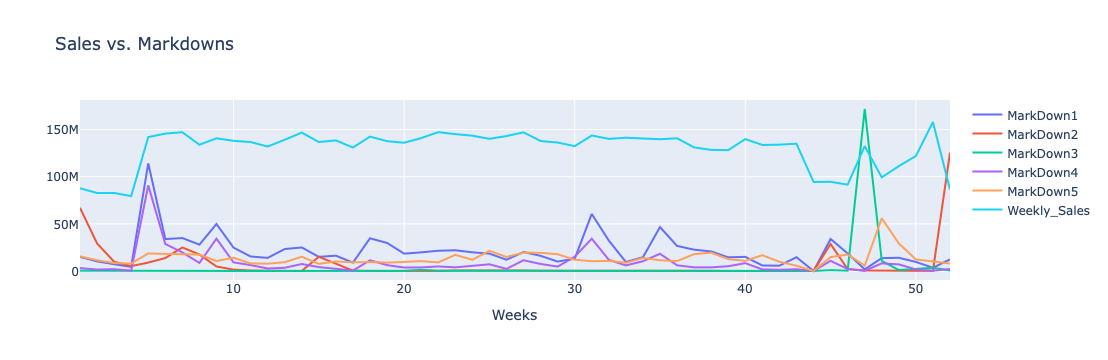

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_weeks.index,
                         y=df_weeks['MarkDown1'], 
                         name='MarkDown1',
                         mode='lines'))
fig.add_trace(go.Scatter(x = df_weeks.index,
                         y=df_weeks['MarkDown2'], 
                         name='MarkDown2',
                         mode='lines'))
fig.add_trace(go.Scatter(x = df_weeks.index,
                         y=df_weeks['MarkDown3'], 
                         name='MarkDown3',
                         mode='lines'))
fig.add_trace(go.Scatter(x = df_weeks.index,
                         y=df_weeks['MarkDown4'], 
                         name='MarkDown4',
                         mode='lines'))
fig.add_trace(go.Scatter(x = df_weeks.index,
                         y=df_weeks['MarkDown5'], 
                         name='MarkDown5',
                         mode='lines'))
fig.add_trace(go.Scatter(x = df_weeks.index,
                         y=df_weeks['Weekly_Sales'], 
                         name='Weekly_Sales',
                         mode='lines'))
fig.update_layout(title="Sales vs. Markdowns", xaxis_title="Weeks")

In [26]:
## Mean sales across years (Highest for Weekly Sales after 50 weeks)

In [27]:
# Weekly Sales per Year with Week

weekly_sales_by_week = train_df.groupby(by=["Year", "Week"], as_index=False).agg({"Weekly_Sales" : ["mean", "median"]}).copy()
weekly_sales_by_week_2010 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2010].copy()
weekly_sales_by_week_2011 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2011].copy()
weekly_sales_by_week_2012 = weekly_sales_by_week.loc[weekly_sales_by_week["Year"] == 2012].copy()

weekly_sales_by_week_2010 = weekly_sales_by_week_2010.reset_index(drop=True)
weekly_sales_by_week_2011 = weekly_sales_by_week_2011.reset_index(drop=True)
weekly_sales_by_week_2012 = weekly_sales_by_week_2012.reset_index(drop=True)

weekly_sales_by_week = pd.concat([weekly_sales_by_week_2010, weekly_sales_by_week_2011, weekly_sales_by_week_2012], axis=1)
weekly_sales_by_week.head()

Year Week  Weekly_Sales            Year Week  Weekly_Sales            Year  \
                      mean    median                     mean    median         
0  2010    5  16836.121997  7904.690  2011    1  14599.244973  6384.990  2012   
1  2010    6  16352.056032  8365.095  2011    2  13891.283484  5961.710  2012   
2  2010    7  16216.658979  8411.250  2011    3  13932.367385  6139.315  2012   
3  2010    8  14899.549688  7235.800  2011    4  13566.239462  6227.980  2012   
4  2010    9  15921.015727  7717.975  2011    5  15773.448776  7312.115  2012   

  Week  Weekly_Sales           
                mean   median  
0    1  15121.231736  6586.37  
1    2  14168.266514  5914.86  
2    3  14221.357405  6146.31  
3    4  13494.232612  5785.84  
4    5  15480.553608  6859.65

In [28]:
# Weekly Sales per Year

weekly_sales_by_year = train_df.groupby(by=["Year"], as_index=False).agg({"Weekly_Sales" : ["mean", "median"]}).copy()

weekly_sales_by_year_2010 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2010].copy()
weekly_sales_by_year_2011 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2011].copy()
weekly_sales_by_year_2012 = weekly_sales_by_year.loc[weekly_sales_by_year["Year"] == 2012].copy()

weekly_sales_by_year_2010 = weekly_sales_by_year_2010.reset_index(drop=True)
weekly_sales_by_year_2011 = weekly_sales_by_year_2011.reset_index(drop=True)
weekly_sales_by_year_2012 = weekly_sales_by_year_2012.reset_index(drop=True)

weekly_sales_by_year = pd.concat([weekly_sales_by_year_2010, weekly_sales_by_year_2011, weekly_sales_by_year_2012], axis=0)
weekly_sales_by_year.head()

Year  Weekly_Sales          
                 mean    median
0  2010  16270.275737  7964.300
0  2011  15954.070675  7522.020
0  2012  15694.948597  7365.095

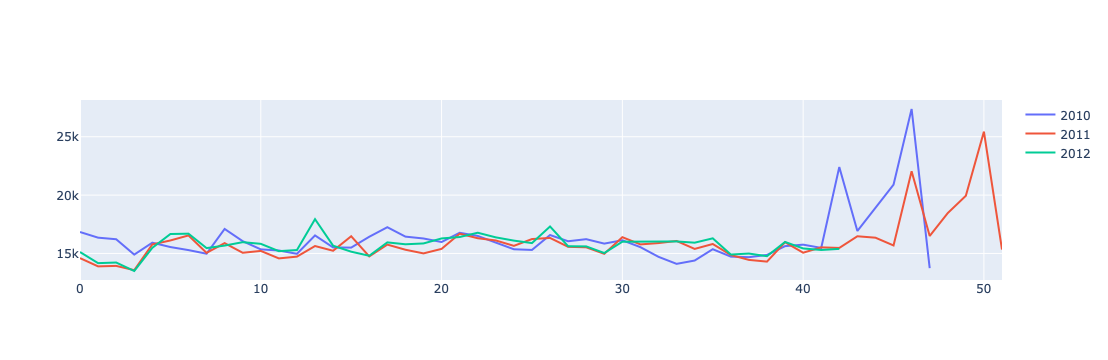

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=weekly_sales_by_week_2010.index, 
                     y=weekly_sales_by_week_2010["Weekly_Sales"]["mean"],
                     name="2010",
                     mode="lines"))
fig.add_trace(go.Scatter(x=weekly_sales_by_week_2011.index, 
                     y=weekly_sales_by_week_2011["Weekly_Sales"]["mean"],
                     name="2011",
                     mode="lines"))
fig.add_trace(go.Scatter(x=weekly_sales_by_week_2012.index, 
                     y=weekly_sales_by_week_2012["Weekly_Sales"]["mean"],
                     name="2012",
                     mode="lines"))

In [30]:
## Clearly there is an increase of sales at the end of the year. 
## Reasons could be anything like year end sales, special offers and discounts during that period, etc.

In [31]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,5,9,3,2010


<Axes: >

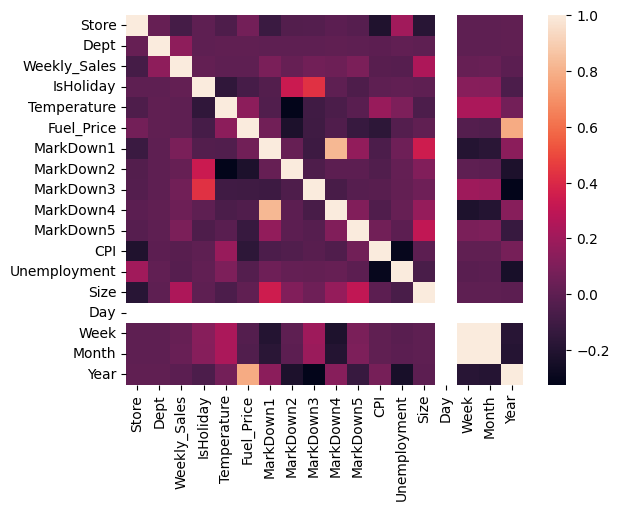

In [32]:
corr = train_df.corr(numeric_only=True)
corr
sns.heatmap(corr)

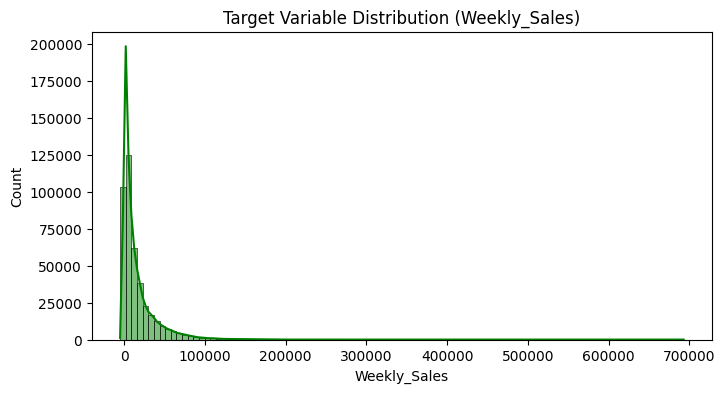

In [33]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.histplot(train_df['Weekly_Sales'], color='g',kde=True, bins=100)
plt.title('Target Variable Distribution (Weekly_Sales)')
plt.show()

In [34]:
## As you can see, our target variable is right skewed/ positively skewed, i.e., here Mean > Mode > Median

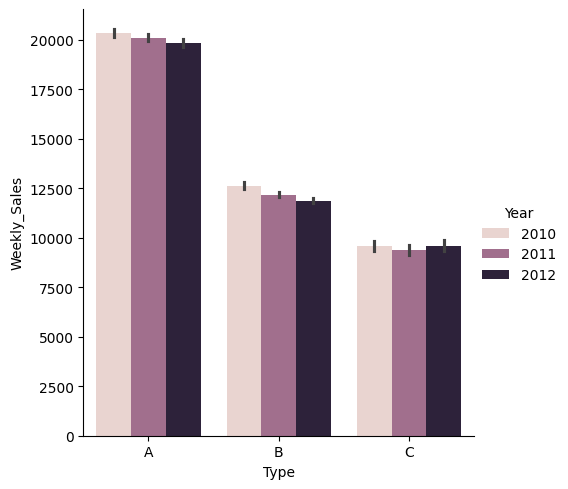

In [35]:
# Understanding 'Type' column for each year

sns.catplot(data=train_df, x="Type", y="Weekly_Sales", hue="Year", kind="bar")

<Figure size 1200x500 with 0 Axes>

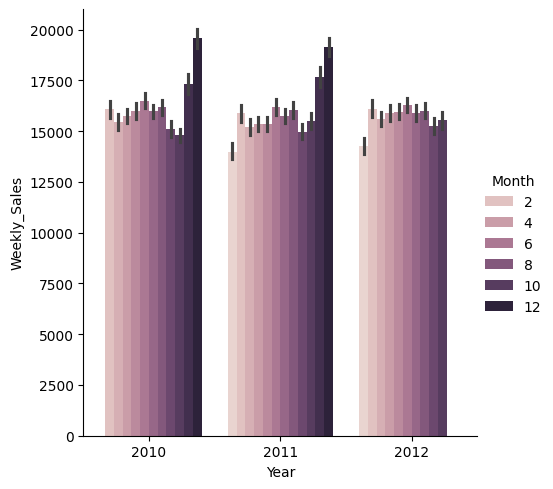

In [36]:
# Understanding month-wise sales for every year 

plt.figure(figsize=[12,5])
sns.catplot(data=train_df, x="Year", y="Weekly_Sales", hue="Month", kind="bar")
plt.show()

In [37]:
## It seems like for year 2010 and 2011, month end sales (November & December) were high, however same was not seen for the year 2012.

In [38]:
train_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Day                     UInt32
Week                    UInt32
Month                    int32
Year                    UInt32
dtype: object

In [39]:
# Making categorical columns and numerical columns in separate lists

nf=[]
cf = ['Date', 'Store', 'Dept', 'IsHoliday', 'Type', 'Day', 'Month', 'Year']
for i in train_df.columns:
  if i not in cf:
    nf.append(i)
print(nf)

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Week']


                                                Numeric Features Distribution                                                 


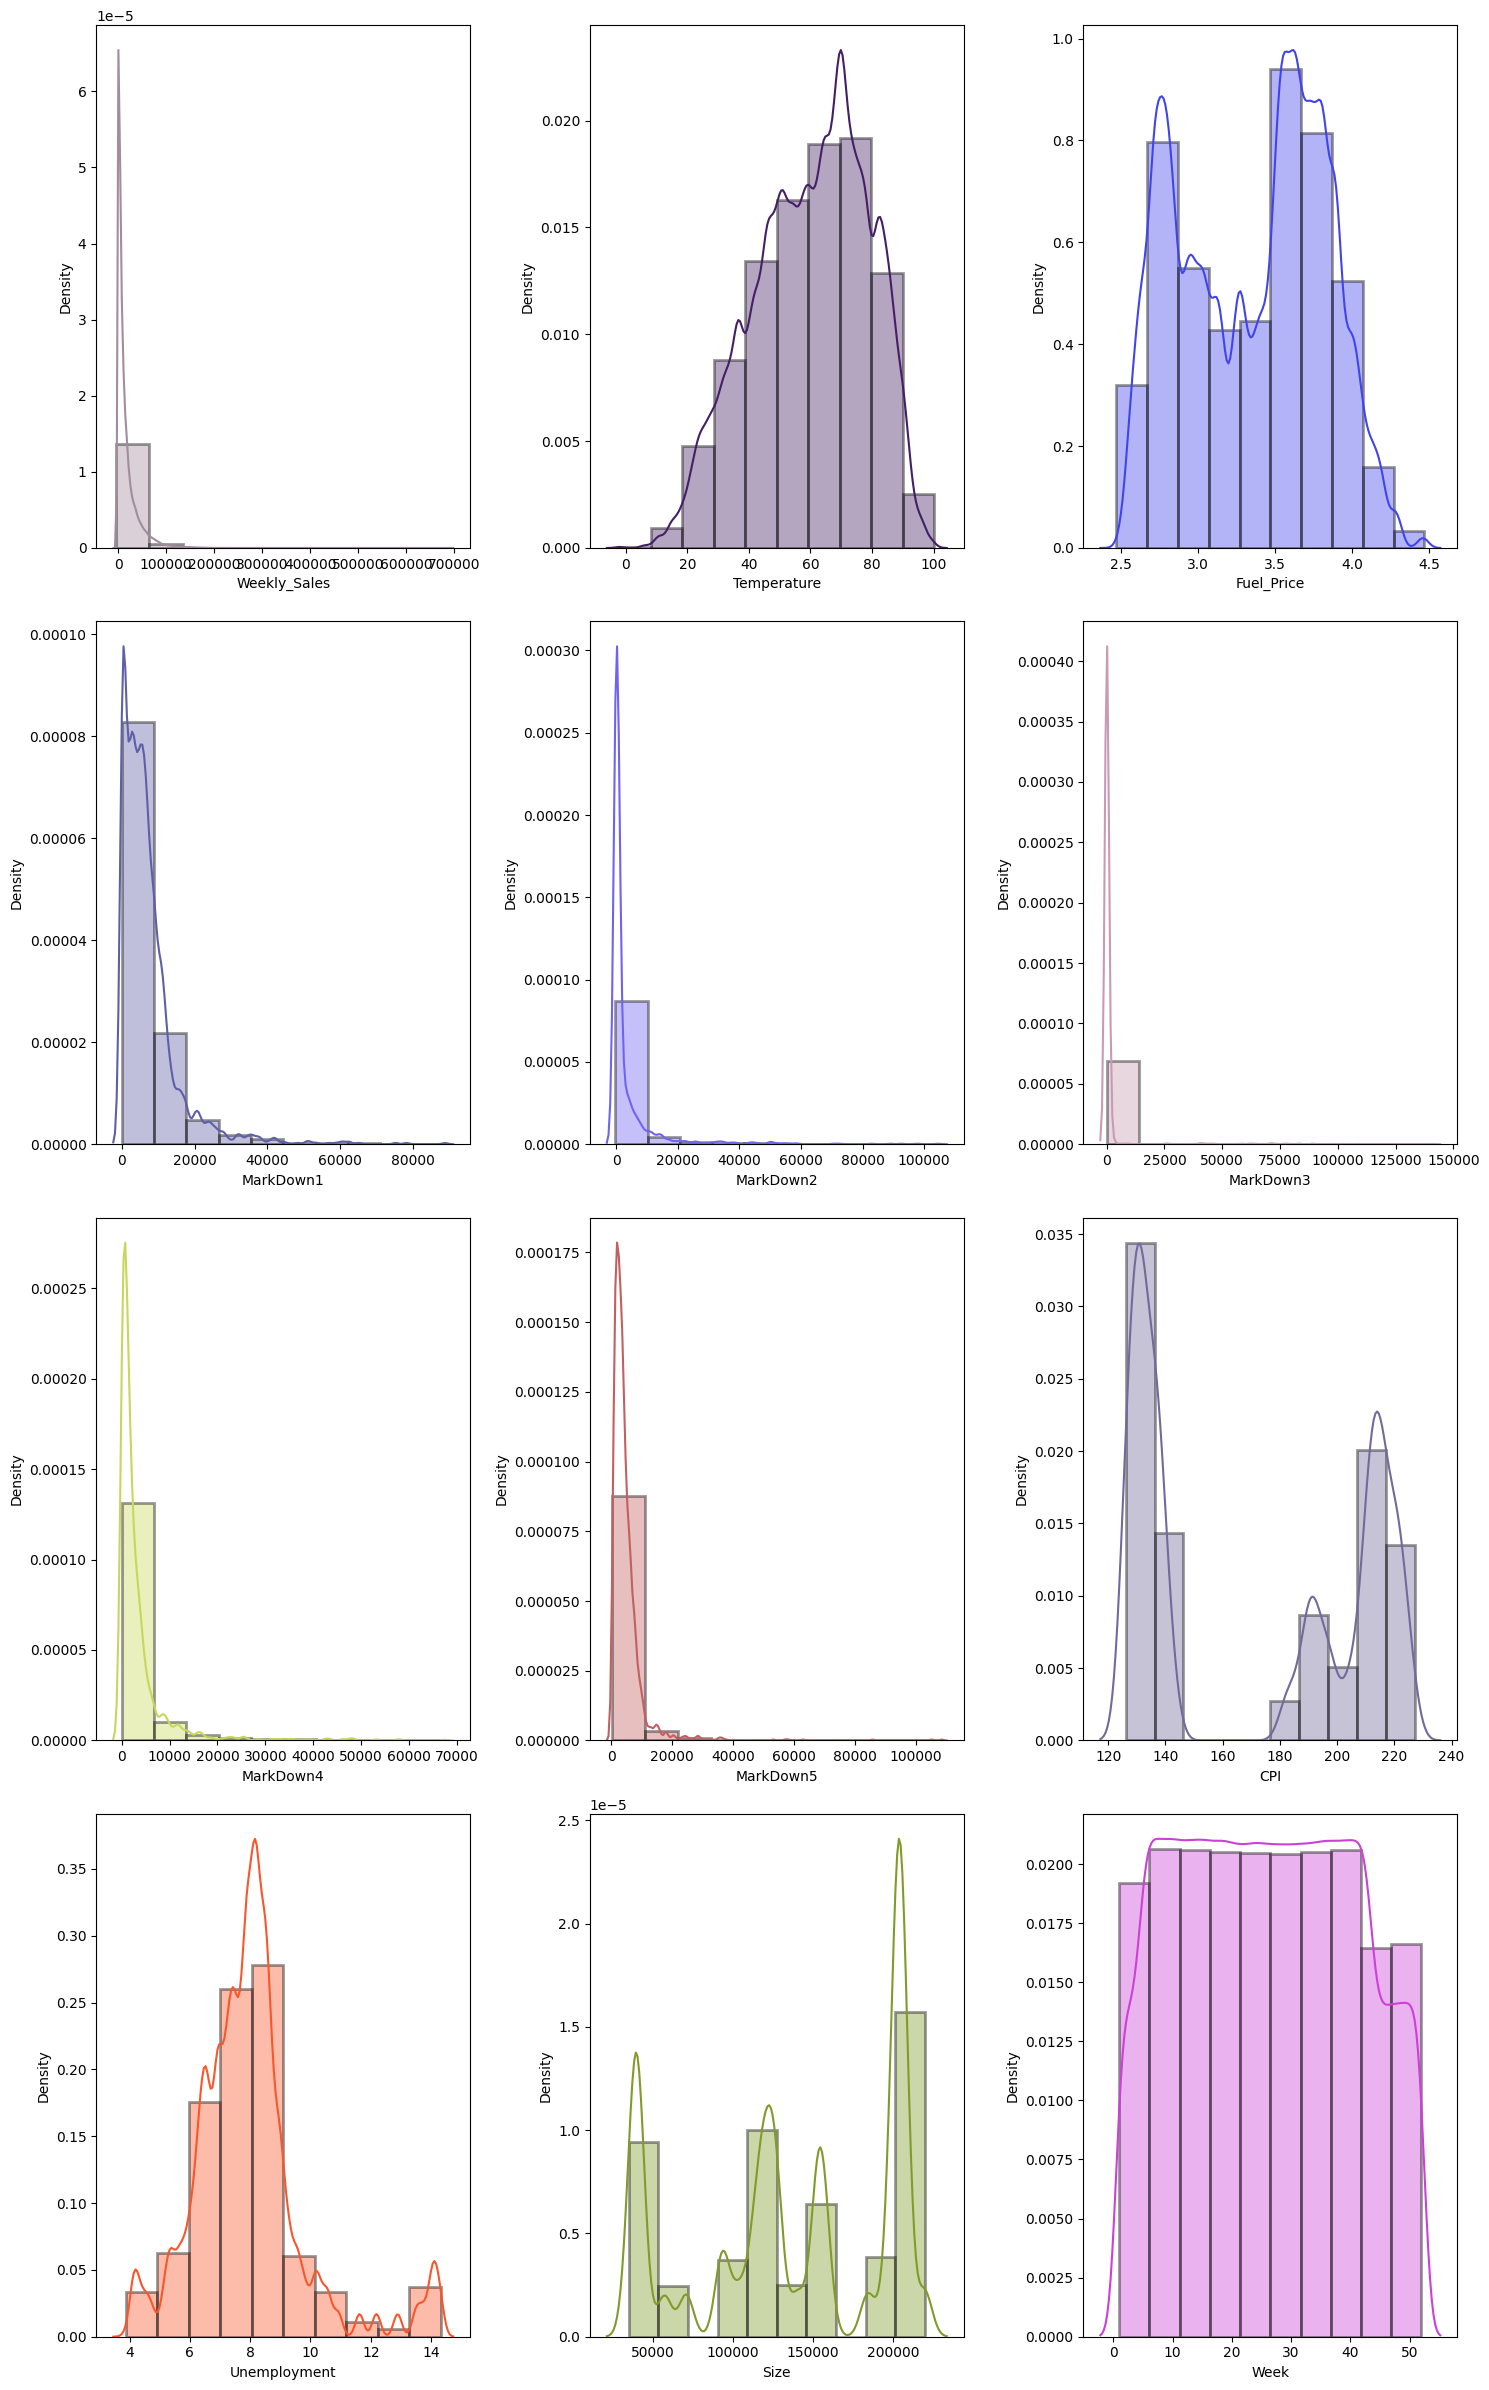

'\nplt.figure(figsize=[15,6*math.ceil(len(nf)/n)])\nfor i in range(len(nf)):\n    plt.subplot(math.ceil(len(nf)/3),n,i+1)\n    train_df.boxplot(nf[i])\nplt.tight_layout()\nplt.show()\n'

In [40]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(train_df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

'''
plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    train_df.boxplot(nf[i])
plt.tight_layout()
plt.show()
'''

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

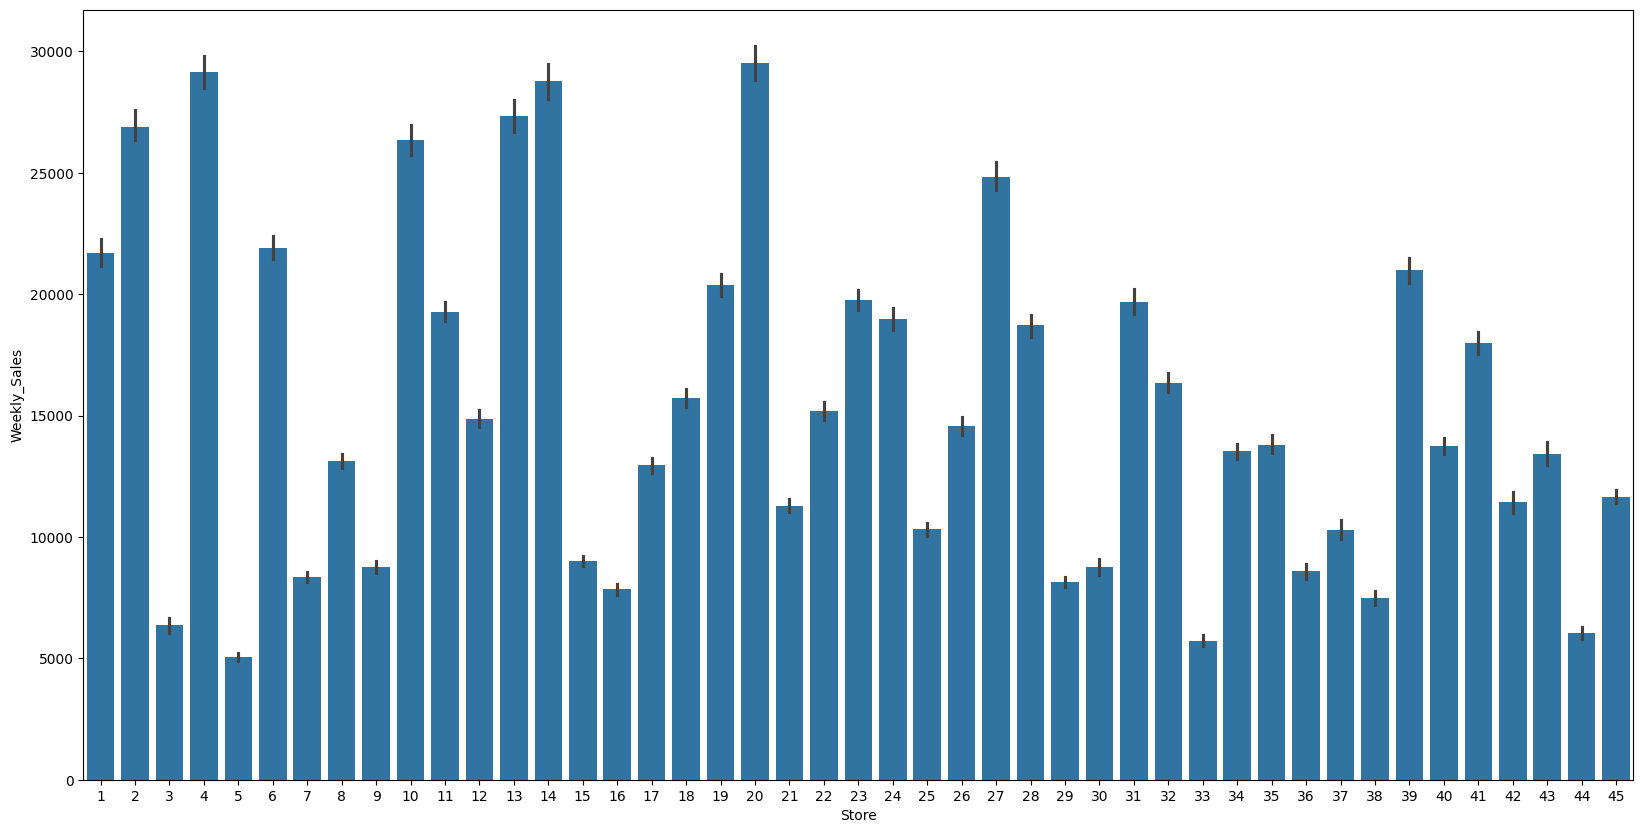

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x=train_df.Store, y = train_df.Weekly_Sales)

In [42]:
## Clearly after looking at the plot you can infer that the Store 20 has the maximum Weekly_Sales and Store 5 has the minimum Weekly_Sales.

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

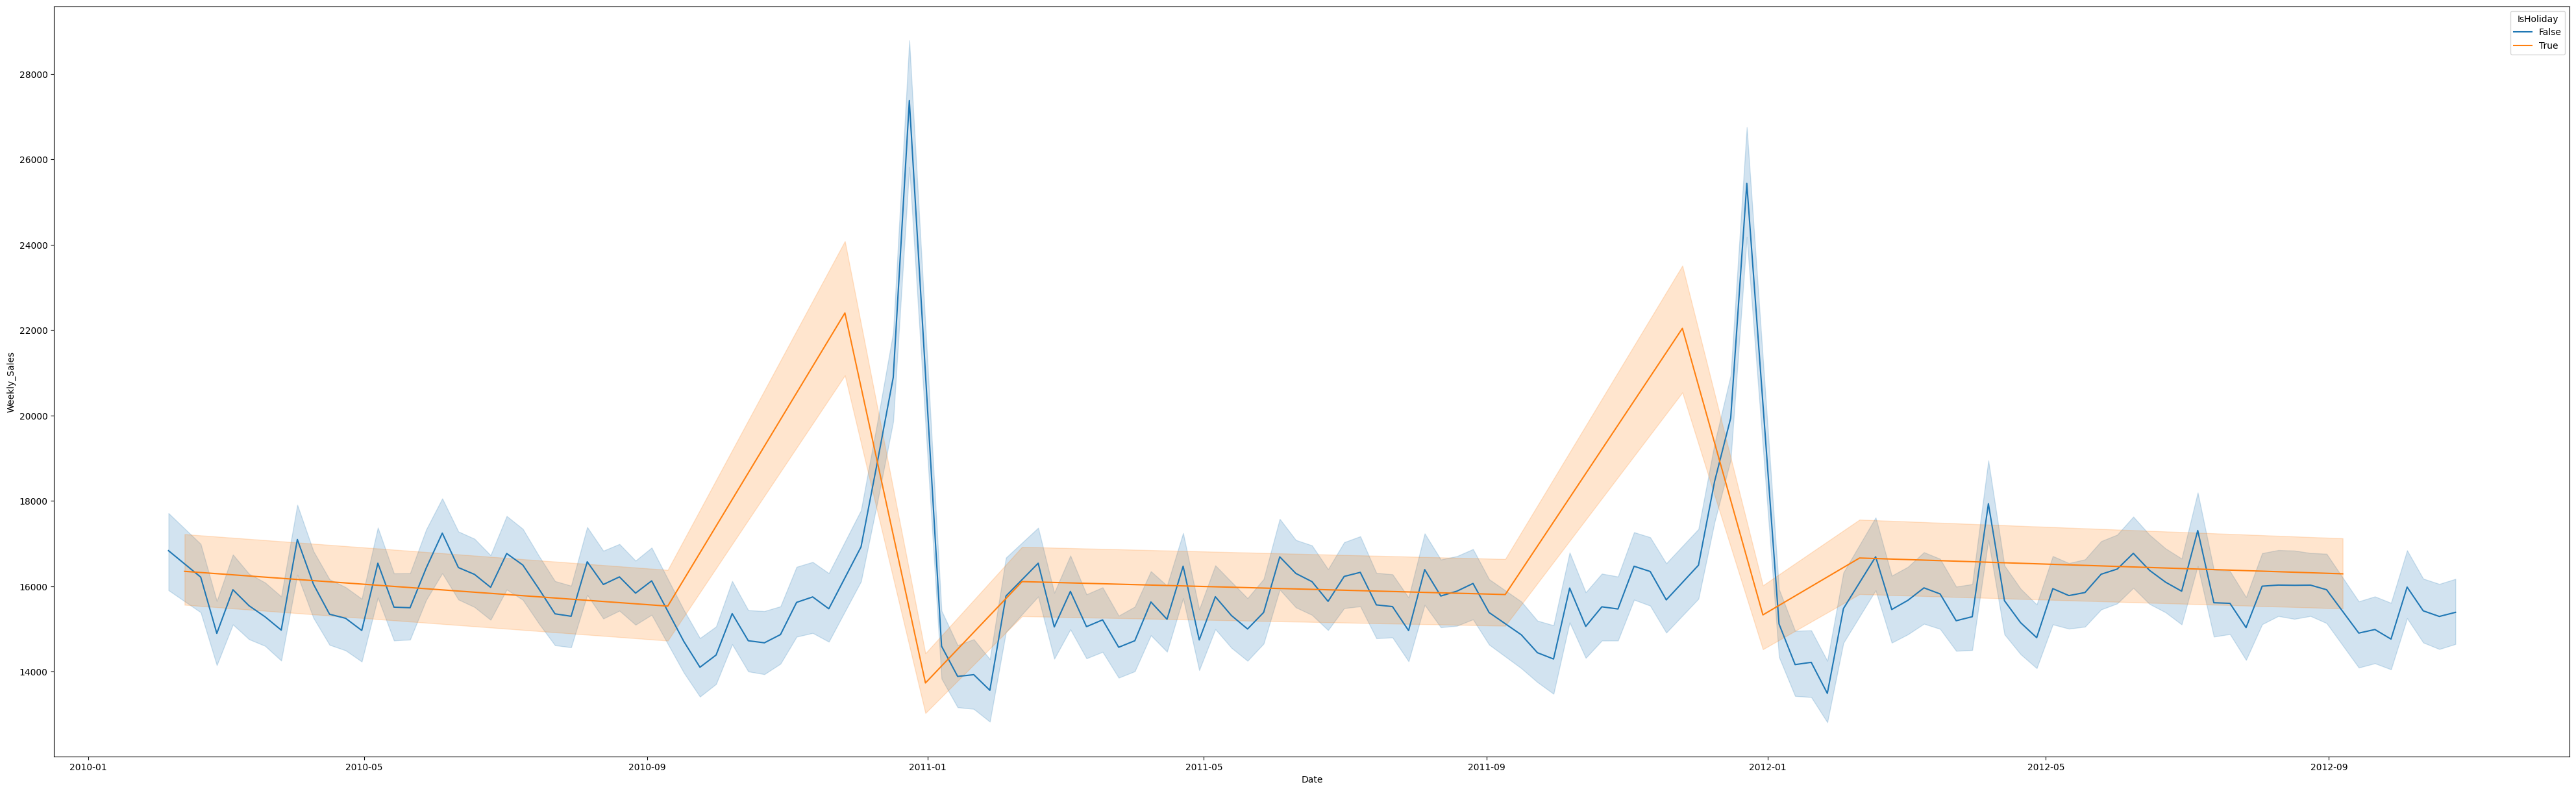

In [43]:
plt.figure(figsize=(50,15))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = train_df, hue='IsHoliday')

In [44]:
## Also now if you look at this lineplot of Weekly_Sales for store 35 it is clear that how sales are varying with during a week of a year, which is highly variable. So you can say that there is very irregular sale pattern for store 35. During the holidays only it is seeing high amount of sales. So you can infer that the store 35 will be seeing high demands in products due sudden rise in sales during holiday seasons.

In [45]:
# Grouping Data by Year

growth = train_df.copy()
growth['Date'] = pd.to_datetime(growth.Date,format='%d-%m-%Y')
growth['Year'], growth['Month'] = growth['Date'].dt.year, growth['Date'].dt.month
growth

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,5,39,9,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,5,40,10,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,5,41,10,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,5,42,10,2012


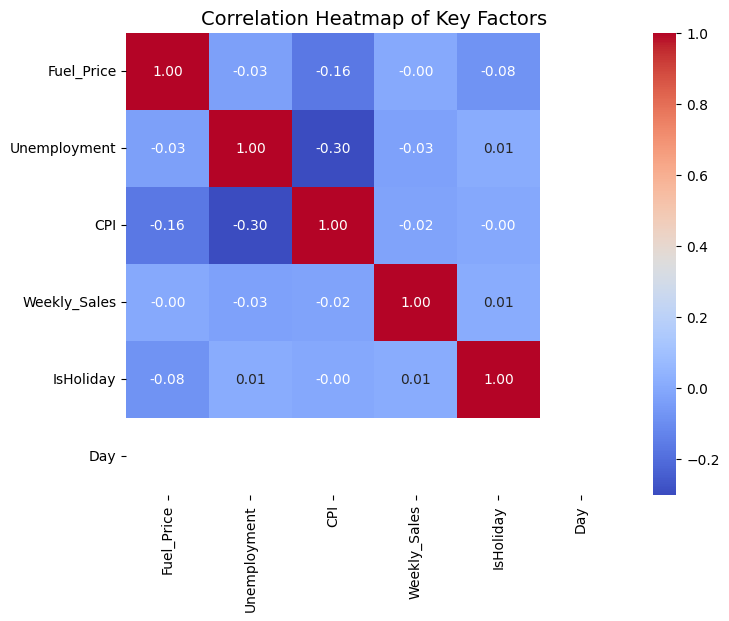

In [46]:
factors = train_df[["Fuel_Price", "Unemployment", "CPI", 
                    "Weekly_Sales", "IsHoliday", "Day"]]

# Compute correlation
corr = factors.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Factors", fontsize=14)
plt.show()

In [47]:
## It seems like Unemployment column is negatively correlated with Fuel_Price and CPI column, whereas CPI and Fuel_Price is positively correlated.

In [48]:
#let's Group the data.

hypothesis = growth.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'IsHoliday']]
factors  = hypothesis.get_group(1)
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()

In [49]:
factors

,Fuel_Price,Unemployment,CPI,Weekly_Sales,IsHoliday,Day
0,2.572,8.106,211.096358,24924.50,False,1
1,2.548,8.106,211.242170,46039.49,True,7
2,2.514,8.106,211.289143,41595.55,False,14
3,2.561,8.106,211.319643,19403.54,False,21
4,2.625,8.106,211.350143,21827.90,False,28
...,...,...,...,...,...,...
10239,3.638,6.908,222.305480,20.06,False,71673
10240,3.730,6.908,222.439015,0.05,True,71680
10241,3.717,6.908,222.582019,0.03,False,71687
10242,3.617,6.573,223.181477,635.00,False,71694


## Hypothesis of CPI, FuelPrice, Unemployment with Weekly_Sales 

0.0
reject null hypothesis


<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

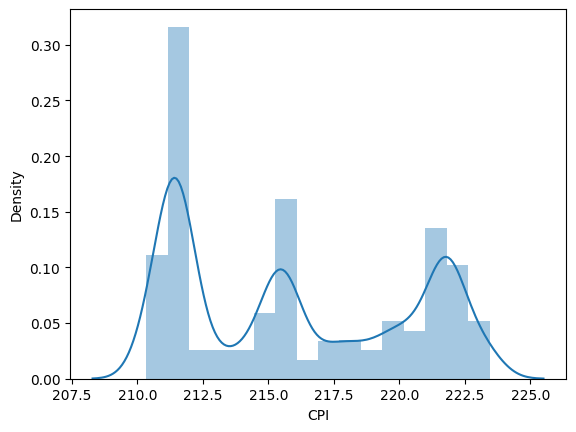

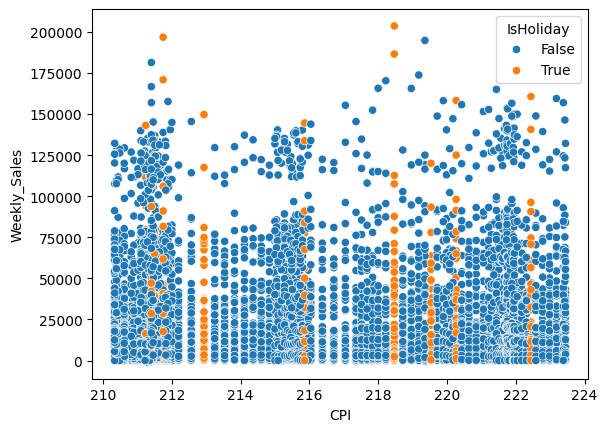

<Figure size 640x480 with 0 Axes>

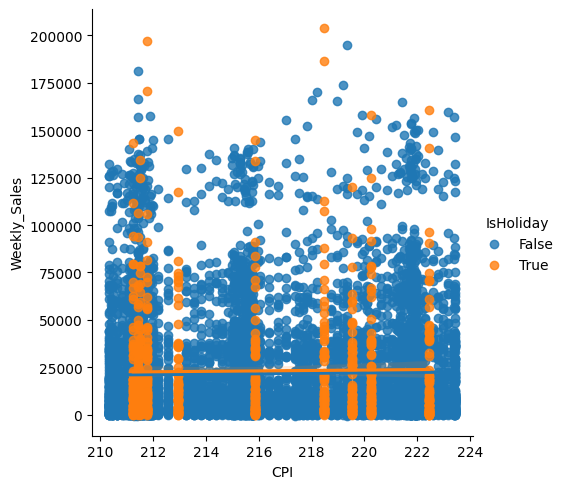

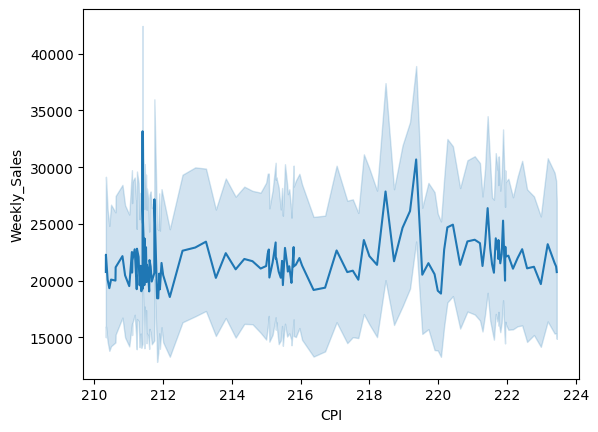

In [53]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])
sns.distplot(factors.CPI)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = factors)

0.0
reject null hypothesis


<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

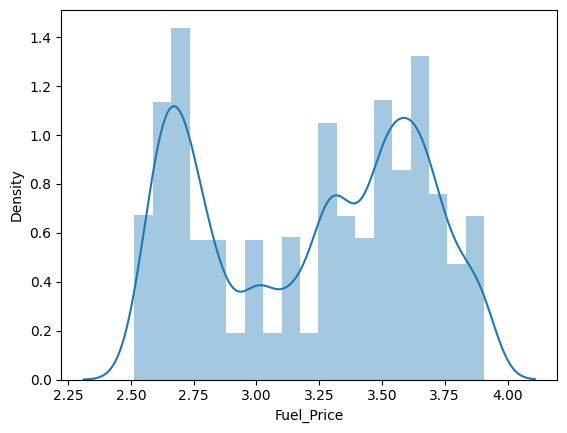

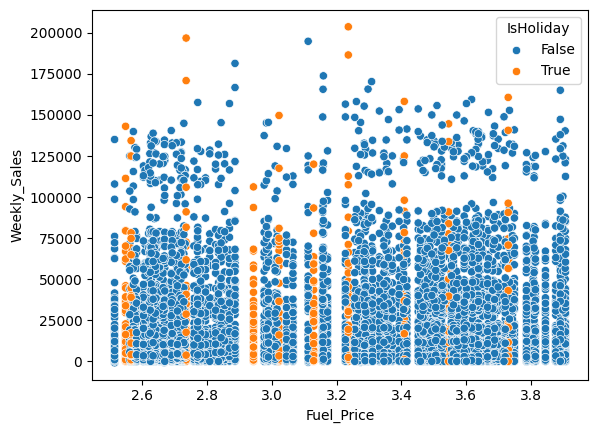

<Figure size 640x480 with 0 Axes>

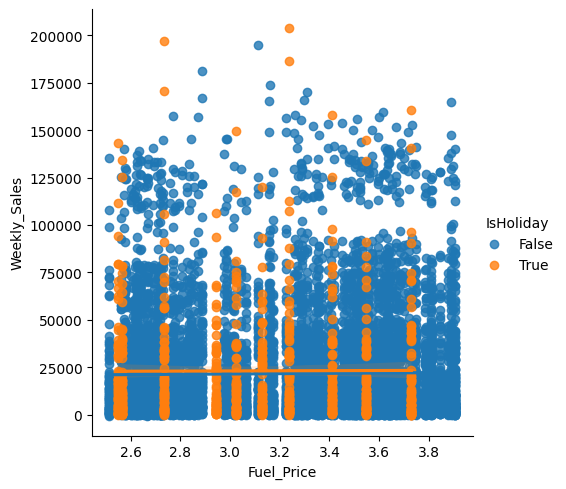

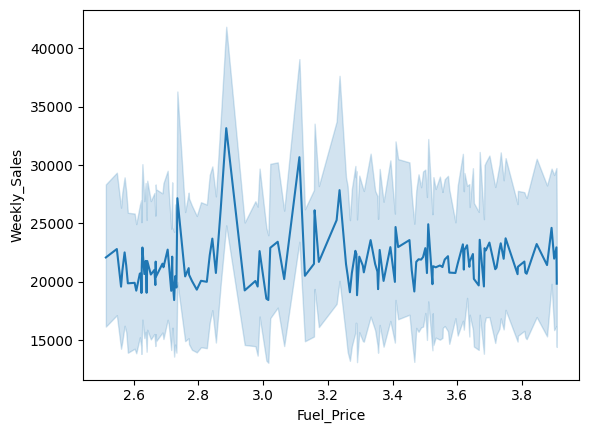

In [54]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])
sns.distplot(factors.Fuel_Price)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)

0.0
reject null hypothesis


<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

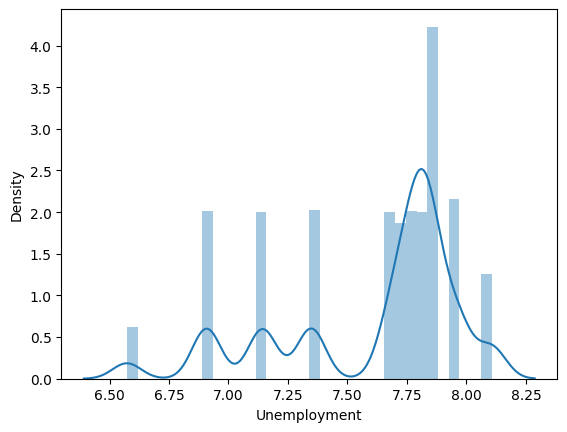

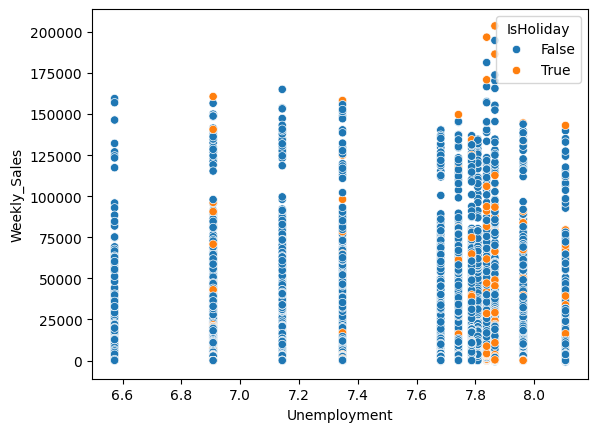

<Figure size 640x480 with 0 Axes>

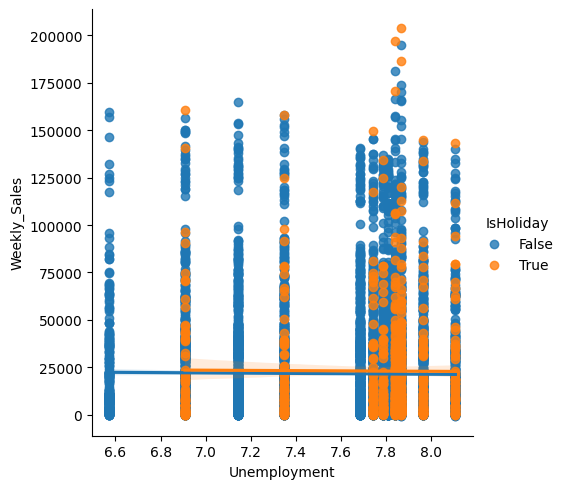

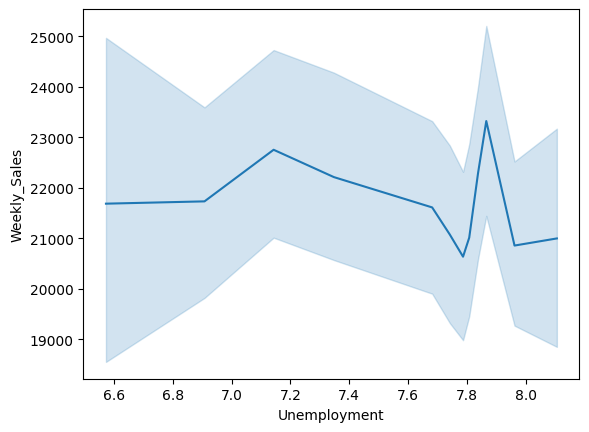

In [52]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])
sns.distplot(factors.Unemployment)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'IsHoliday')
plt.figure()
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = factors)

In [55]:
### Plotting Weekly_sales day wise for store 1, by keeping holidays as a parameter to get more insights

<Axes: xlabel='Day', ylabel='Weekly_Sales'>

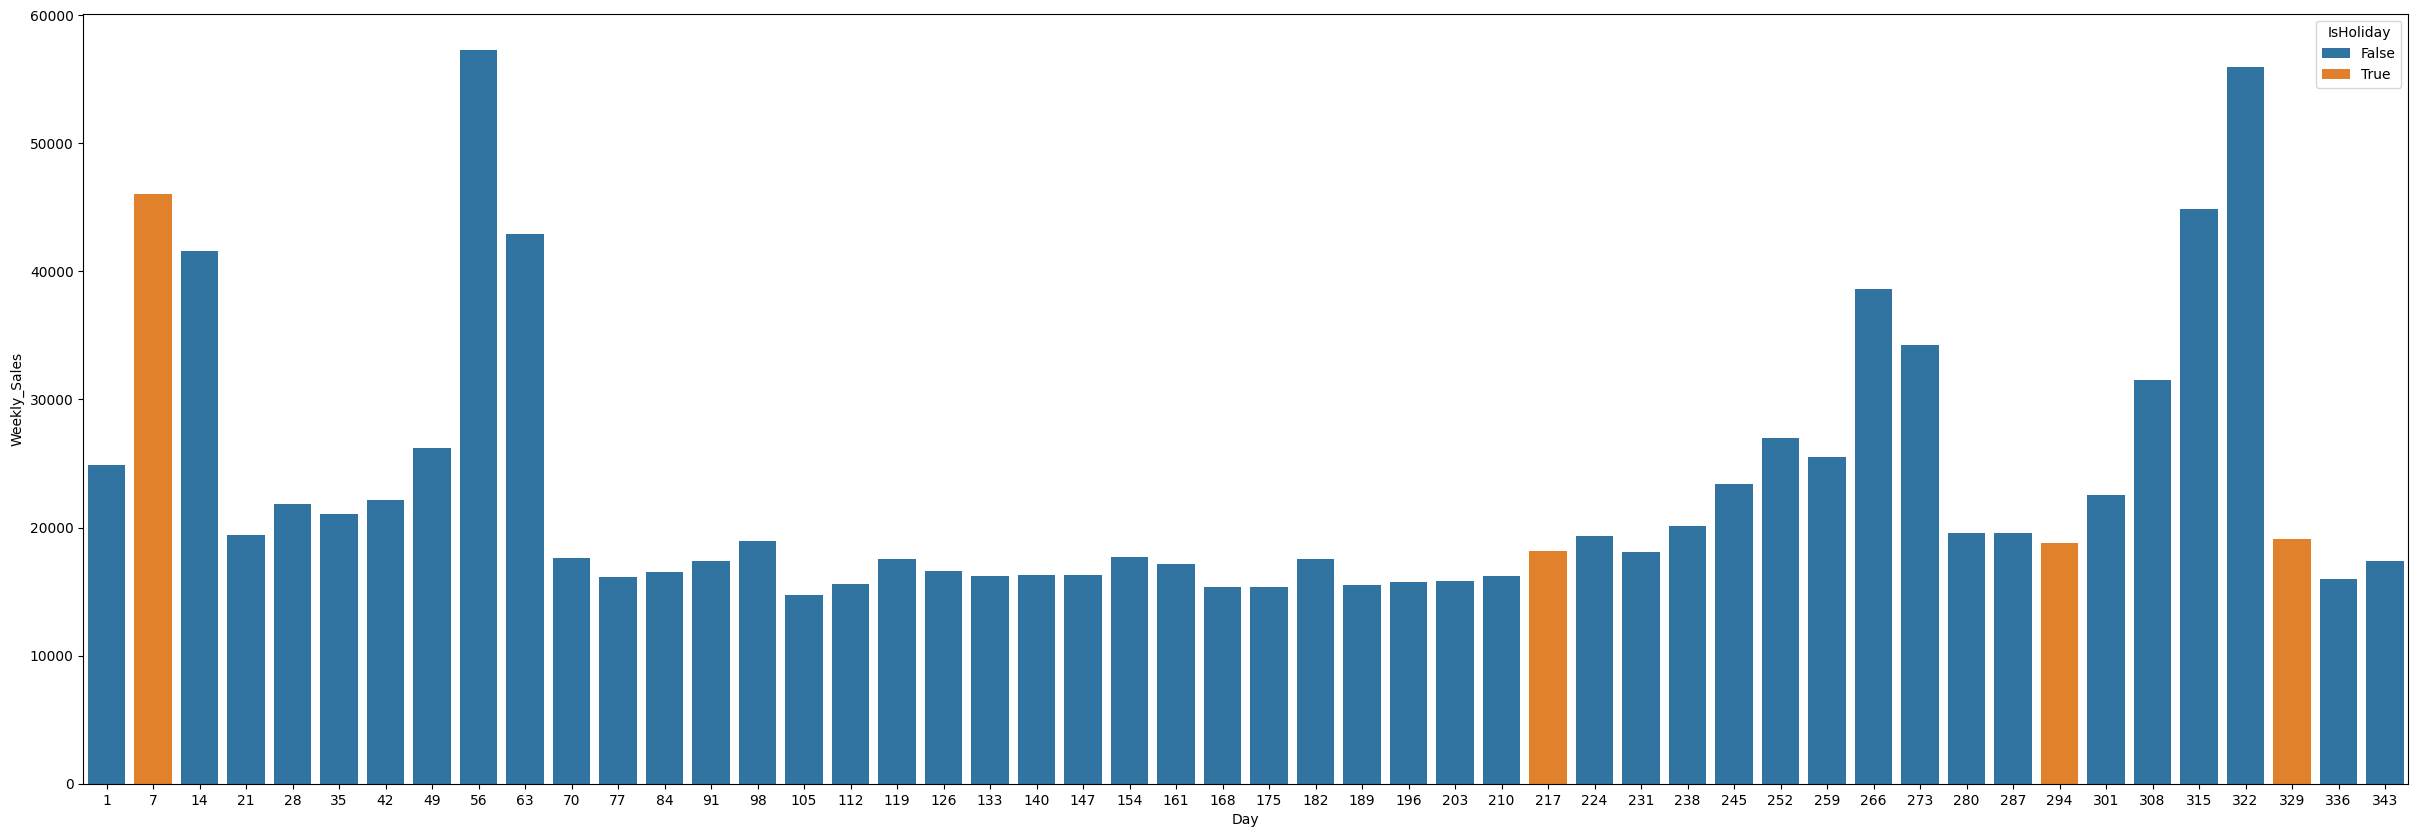

In [56]:
plt.figure(figsize=(30,10))
sns.barplot(x='Day', y = 'Weekly_Sales', data = factors.head(50), hue = 'IsHoliday')

## Data Preprocessing 

In [59]:
test_df.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
dtype: int64

In [60]:
train_data = train_df.copy()
test_data = test_df.copy()
train_data.fillna(0, inplace=True)


In [61]:
test_data.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
dtype: int64

In [62]:
test_data['CPI'].fillna(test_data['CPI'].mean(), inplace=True)
test_data['Unemployment'].fillna(test_data['Unemployment'].mean(), inplace=True)
test_data.fillna(0, inplace=True)

In [63]:
test_data.isna().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Day             0
Week            0
Month           0
Year            0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['IsHoliday'] = le.fit_transform(train_data['IsHoliday'])
test_data['IsHoliday'] = le.fit_transform(test_data['IsHoliday'])
train_data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,5,9,3,2010


In [65]:
train_data['Type'] = le.fit_transform(train_data['Type'])
test_data['Type'] = le.fit_transform(test_data['Type'])

In [66]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,5,6,2,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,5,7,2,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,5,8,2,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,5,9,3,2010


In [67]:
train_data.corr(method="spearman", numeric_only=True)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
Store,1.000000,0.014351,-0.102241,-0.000546,-0.056964,0.074177,-0.033837,-0.054176,-0.030169,-0.094695,-0.021395,-0.230493,0.294783,0.150113,-0.159639,NaN,0.001077,0.001051,0.002944
Dept,0.014351,1.000000,-0.013764,0.000808,0.001082,0.003303,0.004629,0.003648,0.005229,0.003369,0.005226,-0.008951,0.006498,-0.010635,0.011152,NaN,0.000699,0.000723,0.003326
Weekly_Sales,-0.102241,-0.013764,1.000000,0.005622,-0.019752,0.001993,0.028768,0.033603,0.037627,0.055983,0.029297,-0.023190,-0.016481,-0.224948,0.289973,NaN,0.023328,0.023872,-0.016781
IsHoliday,-0.000546,0.000808,0.005622,1.000000,-0.144437,-0.080350,0.019018,0.063969,0.066538,0.020766,0.015241,-0.004371,0.010456,-0.000680,0.000566,NaN,0.118563,0.118579,-0.056416
Temperature,-0.056964,0.001082,-0.019752,-0.144437,1.000000,0.127758,-0.018741,-0.130960,-0.073936,-0.033236,-0.028192,0.172553,0.029806,0.019097,-0.042945,NaN,0.243319,0.241262,0.065976
Fuel_Price,0.074177,0.003303,0.001993,-0.080350,0.127758,1.000000,0.468784,0.289380,0.401530,0.428308,0.444046,-0.041176,-0.060405,0.035087,0.004352,NaN,-0.035006,-0.045654,0.761595
MarkDown1,-0.033837,0.004629,0.028768,0.019018,-0.018741,0.468784,1.000000,0.783686,0.901019,0.953158,0.967822,0.184468,-0.229054,-0.056088,0.075136,NaN,-0.016808,-0.025664,0.799985
MarkDown2,-0.054176,0.003648,0.033603,0.063969,-0.130960,0.289380,0.783686,1.000000,0.713975,0.776599,0.776207,0.147771,-0.182359,-0.087027,0.100114,NaN,-0.089407,-0.101851,0.607671
MarkDown3,-0.030169,0.005229,0.037627,0.066538,-0.073936,0.401530,0.901019,0.713975,1.000000,0.868615,0.903350,0.166963,-0.208524,-0.053646,0.085753,NaN,0.062972,0.059049,0.697235
MarkDown4,-0.094695,0.003369,0.055983,0.020766,-0.033236,0.428308,0.953158,0.776599,0.868615,1.000000,0.924481,0.175404,-0.221480,-0.103638,0.136681,NaN,-0.006906,-0.014057,0.741685


## Predictive Modelling

In [68]:
features = ["Week", "CPI", "Unemployment", "Size", 'Type', 'Dept', 'Store']
train_data[features]
train_data["Week"] = train_data['Week'].astype(int)

In [69]:
from sklearn.model_selection import train_test_split
X = train_data[features].copy()
y = train_data['Weekly_Sales'].copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

In [70]:
!pip install lightgbm

In [71]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [72]:
models = {
    'lr' : linear_model.LinearRegression(),
    'xgb' : xgb.XGBRegressor(random_state=1, objective='reg:squarederror'),
    'cb' : cb.CatBoostRegressor(random_state=1, verbose=False),
    'lgb' : lgb.LGBMRegressor(random_state=1),
    'rfr' : RandomForestRegressor(random_state=1)
}

In [73]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 37.1 MB/s  0:00:002.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearn.metrics import mean_squared_error



def valid_model(name, model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    rmse = np.sqrt(mse)
    return rmse


results = {}
for name, model in models.items():
    rmse = valid_model(name, model, X_train, y_train, X_valid, y_valid)
    results[name] = rmse
    print(f"{name} : {rmse:.4f}")


print("\n Models ranked by performance:")
for name, rmse in sorted(results.items(), key=lambda x: x[1]):
    print(f"{name}: {rmse:.4f}")


lr : 21806.1429
xgb : 5230.9802
cb : 5579.4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 7
[LightGBM] [Info] Start training from score 15979.221909
lgb : 6812.8976
rfr : 3636.2488

 Models ranked by performance:
rfr: 3636.2488
xgb: 5230.9802
cb: 5579.4671
lgb: 6812.8976
lr: 21806.1429


In [75]:
RF = RandomForestRegressor(n_estimators=50,          # Use fewer trees (e.g., 50 instead of 100)
    max_depth=12,             # ***This is the most important change***. Limits tree depth.
    min_samples_leaf=10,      # Prevents trees from creating tiny, specific leaves.
    n_jobs=-1,                # This uses all your CPU cores to speed up training.
    random_state=1)
RF.fit(X, y)

,n_estimators,50
,criterion,'squared_error'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
test = test_data[features].copy()
preds = RF.predict(test)
preds

array([33630.97450566, 19714.72054875, 19777.43200209, ...,
         170.73889548,   170.73889548,   170.73889548])

In [77]:
sample['Weekly_Sales'] = preds
sample.to_csv('predictions.csv', index=False)

In [78]:
import joblib

# After fitting the model on the full dataset
# RF.fit(X, y)

# Save the trained model to a file
joblib.dump(RF, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [79]:
import pickle

with open('Walmart_sales_forecasting.pkl', 'wb') as f:
    pickle.dump(RF, f)
